### Practice using pandas and logreg

-  Read in data and provide summary statistics

In [1]:
import pandas as pd
colnames = ['sepal_len','sepal_wid','petal_len','petal_wid','irisClass']
M=pd.read_csv('data\\iris.data', header=None, names=colnames)
M.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- Check the data type of each column

In [2]:
M.dtypes

sepal_len    float64
sepal_wid    float64
petal_len    float64
petal_wid    float64
irisClass     object
dtype: object

- Convert 'irisClass' from string object to "category"

In [3]:
M['irisClass']=M.irisClass.astype('category')
M['irisClass'].replace('Iris-virginica','vir',inplace=True)
M['irisClass'].replace('Iris-setosa','set',inplace=True)
M['irisClass'].replace('Iris-versicolor','ver',inplace=True)
M.irisClass.value_counts()

vir    50
set    50
ver    50
Name: irisClass, dtype: int64

- Get summary statistics by irisClass

In [4]:
pd.set_option('display.precision', 2)
M.groupby('irisClass').agg(['mean','std','min','max'])

sepal_len                 sepal_wid                 petal_len        \
               mean   std  min  max      mean   std  min  max      mean   std   
irisClass                                                                       
set            5.01  0.35  4.3  5.8      3.42  0.38  2.3  4.4      1.46  0.17   
ver            5.94  0.52  4.9  7.0      2.77  0.31  2.0  3.4      4.26  0.47   
vir            6.59  0.64  4.9  7.9      2.97  0.32  2.2  3.8      5.55  0.55   

                    petal_wid                  
           min  max      mean   std  min  max  
irisClass                                      
set        1.0  1.9      0.24  0.11  0.1  0.6  
ver        3.0  5.1      1.33  0.20  1.0  1.8  
vir        4.5  6.9      2.03  0.27  1.4  2.5

- Create two new variables to represent lenth/width ratio for sepal and petal

In [5]:
M['sepal_ratio']= M.sepal_len/M.sepal_wid
M['petal_ratio']= M.petal_len/M.petal_wid
M.head()

,sepal_len,sepal_wid,petal_len,petal_wid,irisClass,sepal_ratio,petal_ratio
0,5.1,3.5,1.4,0.2,set,1.46,7.0
1,4.9,3.0,1.4,0.2,set,1.63,7.0
2,4.7,3.2,1.3,0.2,set,1.47,6.5
3,4.6,3.1,1.5,0.2,set,1.48,7.5
4,5.0,3.6,1.4,0.2,set,1.39,7.0


In [6]:
%matplotlib inline

- Summary plot of means for each variable

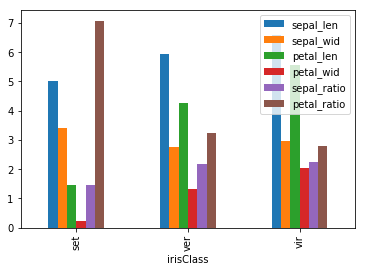

In [7]:
M.groupby('irisClass').mean().plot(kind='bar')

- Scatter plot of petal_ratio x sepal_ratio

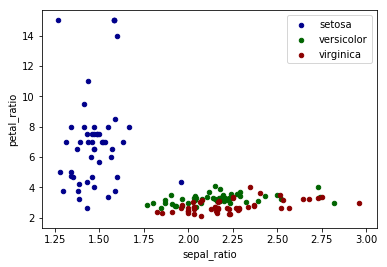

In [8]:
ax1=M[M.irisClass=='set'].plot(kind = 'scatter', x ='sepal_ratio',y='petal_ratio',color='DarkBlue',label='setosa')
M[M.irisClass=='ver'].plot(kind = 'scatter', x ='sepal_ratio',y='petal_ratio',color='DarkGreen',label='versicolor', ax=ax1)
M[M.irisClass=='vir'].plot(kind = 'scatter', x ='sepal_ratio',y='petal_ratio',color='DarkRed',label='virginica', ax=ax1)

- Looks like Setosa can be easily separately from versicolor and virginica
- Separating Versicolor and Virginica might need a little more work

In [9]:
# Creat dummy variables so that it's one class =1, others=0
class_dummies =pd.get_dummies(M.irisClass)  
M = pd.concat([M,class_dummies],axis=1)
feature_cols = ['sepal_len','sepal_wid','petal_len','petal_wid']

- Divide data into 2 sets (sample each class equally)

In [10]:
train=pd.DataFrame(columns=colnames);
test =pd.DataFrame(columns=colnames);
for c in ['set','vir','ver']:
    S=M.loc[M.irisClass==c]
    trainingSample = S.sample(frac=0.70,random_state=95)
    testSample =  S.loc[~S.index.isin(trainingSample.index),:]
    train=pd.concat([train,trainingSample],axis=0)
    test=pd.concat([test,testSample],axis=0)

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [12]:
# set vs. others
X_train = train.loc[:,feature_cols]
y_train = train.loc[:,'set']    # this is one of the 3 new dummy variables 
X_test  = test.loc[:,feature_cols]
y_test  = test.loc[:,'set']
logreg.fit(X_train,y_train)
new_pred_class = logreg.predict(X_test)
new_pred_prob = logreg.predict_proba(X_test)
accuracy_set=(new_pred_class==y_test).mean()
test['pred_set']=new_pred_class
test['prob_set']=new_pred_prob[:,1]   # take the probability for class 1
accuracy_set

1.0

In [13]:
# ver vs. others
X_train = train.loc[:,feature_cols]
y_train = train.loc[:,'ver']    # this is one of the 3 new dummy variables 
X_test  = test.loc[:,feature_cols]
y_test  = test.loc[:,'ver']
logreg.fit(X_train,y_train)
new_pred_class = logreg.predict(X_test)
new_pred_prob = logreg.predict_proba(X_test)
accuracy_ver=(new_pred_class==y_test).mean()
test['pred_ver']=new_pred_class
test['prob_ver']=new_pred_prob[:,1]
accuracy_ver

0.64444444444444449

In [14]:
# vir vs. others
X_train = train.loc[:,feature_cols]
y_train = train.loc[:,'vir']    # this is one of the 3 new dummy variables 
X_test  = test.loc[:,feature_cols]
y_test  = test.loc[:,'vir']
logreg.fit(X_train,y_train)
new_pred_class = logreg.predict(X_test)
new_pred_prob = logreg.predict_proba(X_test)
accuracy_vir=(new_pred_class==y_test).mean()
test['pred_vir']=new_pred_class
test['prob_vir']=new_pred_prob[:,1]
accuracy_vir

0.93333333333333335

- In fact, logistic regression can be applied to multiclass classification problem directly [the behind-the-scene is one vs. others as shown above]

In [15]:
X_train = train.loc[:,feature_cols]
y_train = train.loc[:,'irisClass']    # this is one of the 3 new dummy variables 
X_test  = test.loc[:,feature_cols]
y_test  = test.loc[:,'irisClass']
logreg.fit(X_train,y_train)
new_pred_class = logreg.predict(X_test)
accuracy=(new_pred_class==y_test).mean()
accuracy

0.93333333333333335